In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# Defining the paths to the repective datasets

data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [8]:
#Defining image dimensions for resizing

img_width = 180
img_height = 180

In [10]:
# Loading the training dataset from a directory structure into a TensorFlow Dataset object that can be used

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,          # Path to the directory containing the training images
    shuffle=True,             # Shuffle the dataset for randomness during training
    image_size=(img_width, img_height),  # Resize all images to the specified width and height
    batch_size=32,            # Number of images in each batch during training
    validation_split=False    # Disable validation split (we already have a validation folder)
)

Found 3115 files belonging to 36 classes.


In [12]:
#To hold the names of all the classes
data_cat = data_train.class_names

In [14]:
# Loading the validation dataset now

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split= False
)

Found 351 files belonging to 36 classes.


In [16]:
#Loading the testing dataset now..

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split= False
)

Found 353 files belonging to 36 classes.


2025-01-18 14:04:01.455696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:01.515713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:01.630852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:01.987413: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


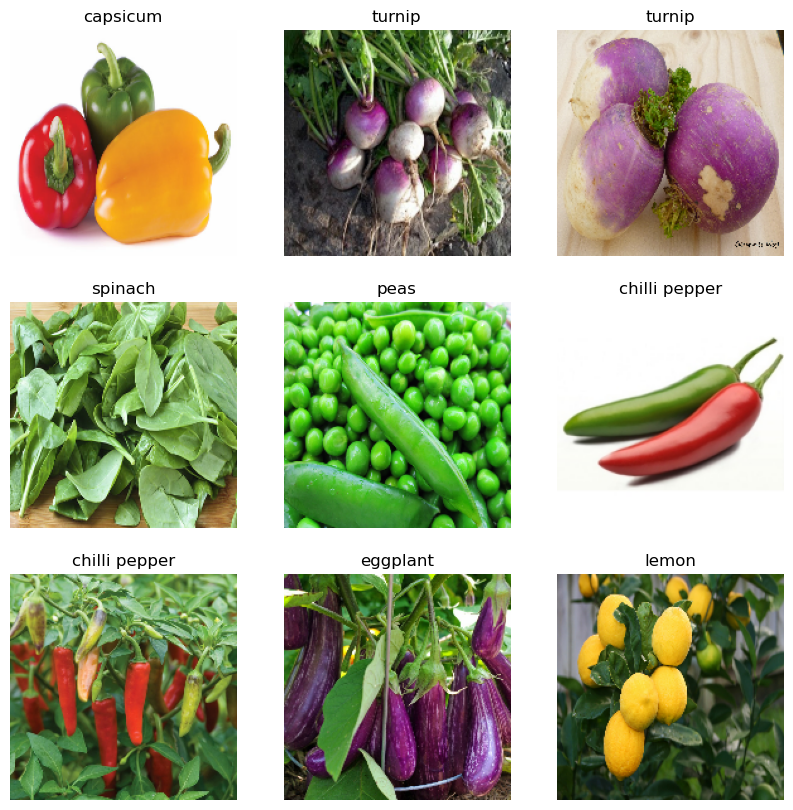

In [18]:
#quick inspection of data

plt.figure(figsize=(10,10))                    #create a figure of specificed size to store images
for image, labels in data_train.take(1):       #take one batch of images and labels from the dataset
    for i in range(9):                         # display 9 images in a 3x3 grid
        plt.subplot(3,3,i+1)                             #divides figure into 3x3 grid for displaying 9 images
        plt.imshow(image[i].numpy().astype('uint8'))     # convert tensor to NumPy array and display the image
        plt.title(data_cat[labels[i]])                   # set the title as the class name
        plt.axis('off')
plt.show()
       

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Images will be stored in the dataset in form of RGB and max value for RGB is 255. We divide by 255 so images are bw 0 and 1

In [23]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
#Building sequential model **

#creating layers...
model = Sequential([
    layers.Rescaling(1./255),  #normalizing pixel values of pictures to improve performance

    # First convolutional layer: detects low-level features like edges
    layers.Conv2D(16, 3, padding='same', activation='relu'),  # 16 filters of size 3x3
    layers.MaxPool2D(),  #to reduce spatial dimensions

    # Second convolutional layer: detects more complex features
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # 32 filters 
    layers.MaxPool2D(), 

    # Third convolutional layer: further detects complex features
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # 64 filters 
    layers.MaxPool2D(),  

   
    layers.Flatten(),  # Converts 2D feature maps to 1D
    layers.Dropout(0.2),  # 20% of the units will be dropped to prevent overfitting

    # Fully connected layer with 128 neurons to learn high-level features
    layers.Dense(128), 
    
    layers.Dense(len(data_cat))  # sets output layer size equals the number of categories
] 
)

NOTE: Starting with 16 filters and increasing them to 32 and 64 is a strategy based on capturing increasingly complex patterns at different layers of the model.
The increase in the number of filters is to allow the network to learn more detailed and higher-level features, following a hierarchical structure.

In [28]:
#Configuration of model by specifying optimizer, loss function, and metric used to track performance

model.compile(optimizer='adam',                                                 #adjusting weights during training
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   #cross-entropy loss for multi-class classification
              metrics=['accuracy'])  #to track accuracy during training

The output is long as model will run multiple iterations, everytime the accuracy will increase and loss with decrease when comparing with validation set

In [31]:
epochs_size = 25      #how many times the model will see the entire training data

# Train the model using the training dataset and validate using the validation dataset

history = model.fit(
    data_train,                 # Training data 
    validation_data=data_val,   # Validation data (used to check model performance after each iteration)
    epochs=epochs_size          
);  


Epoch 1/25


2025-01-18 14:04:11.588004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:11.742380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - accuracy: 0.0078 - loss: 3.8402  

2025-01-18 14:04:12.223544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 35s 373ms/step - accuracy: 0.0163 - loss: 4.0015

2025-01-18 14:04:13.029212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:13.031967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 29s 317ms/step - accuracy: 0.0223 - loss: 4.0020

2025-01-18 14:04:13.398574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 24s 290ms/step - accuracy: 0.0312 - loss: 3.9101

2025-01-18 14:04:15.145900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - accuracy: 0.0351 - loss: 3.8522

2025-01-18 14:04:16.366681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - accuracy: 0.0393 - loss: 3.7989

2025-01-18 14:04:17.869683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 19s 267ms/step - accuracy: 0.0400 - loss: 3.7908

2025-01-18 14:04:18.111385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 19s 267ms/step - accuracy: 0.0412 - loss: 3.7761

2025-01-18 14:04:18.642037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - accuracy: 0.0436 - loss: 3.7479

2025-01-18 14:04:19.394103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - accuracy: 0.0454 - loss: 3.7284

2025-01-18 14:04:20.166536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step - accuracy: 0.0460 - loss: 3.7224

2025-01-18 14:04:20.402132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.0471 - loss: 3.7109

2025-01-18 14:04:21.048257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 15s 259ms/step - accuracy: 0.0482 - loss: 3.7000

2025-01-18 14:04:21.582698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 12s 255ms/step - accuracy: 0.0538 - loss: 3.6497

2025-01-18 14:04:23.972953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - accuracy: 0.0544 - loss: 3.6448

2025-01-18 14:04:24.320723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.0629 - loss: 3.5832

2025-01-18 14:04:27.320038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:27.565316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.0652 - loss: 3.5699

2025-01-18 14:04:28.294959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.0666 - loss: 3.5612

2025-01-18 14:04:28.802795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.0754 - loss: 3.5079

2025-01-18 14:04:31.901311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.0867 - loss: 3.4420

2025-01-18 14:04:36.080093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:36.501814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.0873 - loss: 3.4386 - val_accuracy: 0.3191 - val_loss: 2.2138
Epoch 2/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 51s 533ms/step - accuracy: 0.3125 - loss: 2.4670

2025-01-18 14:04:38.118737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.3281 - loss: 2.4408

2025-01-18 14:04:38.425226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 26s 279ms/step - accuracy: 0.3405 - loss: 2.4225

2025-01-18 14:04:38.933062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.3528 - loss: 2.3789

2025-01-18 14:04:39.845812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - accuracy: 0.3448 - loss: 2.3901

2025-01-18 14:04:40.788760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:40.800044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - accuracy: 0.3368 - loss: 2.4046

2025-01-18 14:04:41.531339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - accuracy: 0.3308 - loss: 2.4168

2025-01-18 14:04:42.547200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:42.749892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - accuracy: 0.3276 - loss: 2.4216

2025-01-18 14:04:43.318950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - accuracy: 0.3211 - loss: 2.4314

2025-01-18 14:04:44.914562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:45.082013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 17s 258ms/step - accuracy: 0.3196 - loss: 2.4331

2025-01-18 14:04:45.637646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:04:45.665638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.3183 - loss: 2.4340

2025-01-18 14:04:46.969903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.3176 - loss: 2.4336

2025-01-18 14:04:47.666277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.3167 - loss: 2.4308

2025-01-18 14:04:49.176152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - accuracy: 0.3166 - loss: 2.4279

2025-01-18 14:04:50.313027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.3169 - loss: 2.4239

2025-01-18 14:04:51.247950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.3173 - loss: 2.4198

2025-01-18 14:04:52.315734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.3188 - loss: 2.4086

2025-01-18 14:04:54.553656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.3190 - loss: 2.4074

2025-01-18 14:04:54.968009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.3202 - loss: 2.3981

2025-01-18 14:04:56.842028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.3240 - loss: 2.3747

2025-01-18 14:05:01.892436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:02.741327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.3242 - loss: 2.3736 - val_accuracy: 0.5698 - val_loss: 1.4409
Epoch 3/25


2025-01-18 14:05:03.790842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.5352 - loss: 1.9134

2025-01-18 14:05:05.048145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - accuracy: 0.5103 - loss: 1.8625

2025-01-18 14:05:06.540818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.4989 - loss: 1.8651

2025-01-18 14:05:07.432165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.4971 - loss: 1.8646

2025-01-18 14:05:07.892425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.4951 - loss: 1.8652

2025-01-18 14:05:08.141291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.4884 - loss: 1.8743

2025-01-18 14:05:09.121463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - accuracy: 0.4857 - loss: 1.8784

2025-01-18 14:05:09.357278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 18s 251ms/step - accuracy: 0.4833 - loss: 1.8815

2025-01-18 14:05:10.062257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - accuracy: 0.4781 - loss: 1.8834

2025-01-18 14:05:11.706132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.4774 - loss: 1.8821

2025-01-18 14:05:12.247563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step - accuracy: 0.4764 - loss: 1.8821

2025-01-18 14:05:13.042866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.4758 - loss: 1.8826

2025-01-18 14:05:13.377113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 15s 260ms/step - accuracy: 0.4739 - loss: 1.8849

2025-01-18 14:05:14.384952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - accuracy: 0.4732 - loss: 1.8856

2025-01-18 14:05:14.890346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 13s 261ms/step - accuracy: 0.4721 - loss: 1.8850

2025-01-18 14:05:16.280009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - accuracy: 0.4716 - loss: 1.8844

2025-01-18 14:05:16.840287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.4714 - loss: 1.8830

2025-01-18 14:05:17.516974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.4716 - loss: 1.8800

2025-01-18 14:05:18.526068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.4717 - loss: 1.8792

2025-01-18 14:05:19.014150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.4725 - loss: 1.8731

2025-01-18 14:05:20.867107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.4729 - loss: 1.8688

2025-01-18 14:05:22.200833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.4731 - loss: 1.8649

2025-01-18 14:05:23.982300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.4743 - loss: 1.8523

2025-01-18 14:05:29.583001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:30.459687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.4745 - loss: 1.8515 - val_accuracy: 0.6838 - val_loss: 1.0748
Epoch 4/25


2025-01-18 14:05:31.279127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:31.359617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:31.418844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 54s 564ms/step - accuracy: 0.6250 - loss: 1.5702

2025-01-18 14:05:31.723379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 31s 341ms/step - accuracy: 0.6022 - loss: 1.4599

2025-01-18 14:05:33.740956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 28s 338ms/step - accuracy: 0.5883 - loss: 1.4887

2025-01-18 14:05:36.168221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:36.252507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 27s 338ms/step - accuracy: 0.5824 - loss: 1.4974

2025-01-18 14:05:36.693334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:36.703688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 26s 333ms/step - accuracy: 0.5750 - loss: 1.5102

2025-01-18 14:05:37.785294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:37.826672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 25s 326ms/step - accuracy: 0.5708 - loss: 1.5177

2025-01-18 14:05:38.304183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - accuracy: 0.5677 - loss: 1.5222

2025-01-18 14:05:38.651492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - accuracy: 0.5607 - loss: 1.5311

2025-01-18 14:05:40.919870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 18s 300ms/step - accuracy: 0.5590 - loss: 1.5317

2025-01-18 14:05:42.559078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 16s 295ms/step - accuracy: 0.5579 - loss: 1.5317

2025-01-18 14:05:43.962536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 14s 294ms/step - accuracy: 0.5578 - loss: 1.5289

2025-01-18 14:05:45.066830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - accuracy: 0.5578 - loss: 1.5276

2025-01-18 14:05:45.605781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:45.618582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 13s 289ms/step - accuracy: 0.5587 - loss: 1.5237

2025-01-18 14:05:46.830362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.5617 - loss: 1.5106

2025-01-18 14:05:49.260877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.5650 - loss: 1.4959

2025-01-18 14:05:51.928133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.5673 - loss: 1.4860

2025-01-18 14:05:54.514123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.5716 - loss: 1.4682

2025-01-18 14:05:58.593934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:05:59.399460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.5719 - loss: 1.4670 - val_accuracy: 0.8348 - val_loss: 0.7199
Epoch 5/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 32s 340ms/step - accuracy: 0.6484 - loss: 1.0555

2025-01-18 14:06:01.036979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - accuracy: 0.6576 - loss: 1.0415

2025-01-18 14:06:01.339890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 23s 259ms/step - accuracy: 0.6614 - loss: 1.0531

2025-01-18 14:06:02.318718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 23s 260ms/step - accuracy: 0.6617 - loss: 1.0581

2025-01-18 14:06:02.578993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.6639 - loss: 1.0626

2025-01-18 14:06:02.850000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.6658 - loss: 1.0637

2025-01-18 14:06:03.293668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - accuracy: 0.6690 - loss: 1.0624

2025-01-18 14:06:03.864373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - accuracy: 0.6742 - loss: 1.0639

2025-01-18 14:06:04.962705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.6792 - loss: 1.0585

2025-01-18 14:06:06.076064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - accuracy: 0.6812 - loss: 1.0545

2025-01-18 14:06:07.156402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 18s 267ms/step - accuracy: 0.6820 - loss: 1.0536

2025-01-18 14:06:07.704384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 18s 267ms/step - accuracy: 0.6829 - loss: 1.0517

2025-01-18 14:06:08.035694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.6843 - loss: 1.0490

2025-01-18 14:06:09.058079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.6866 - loss: 1.0446

2025-01-18 14:06:10.580030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.6869 - loss: 1.0436

2025-01-18 14:06:10.797507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.6891 - loss: 1.0365

2025-01-18 14:06:12.281167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.6905 - loss: 1.0323

2025-01-18 14:06:13.330558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.6948 - loss: 1.0201

2025-01-18 14:06:15.788470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - accuracy: 0.6959 - loss: 1.0170

2025-01-18 14:06:16.471036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.6970 - loss: 1.0141

2025-01-18 14:06:17.230635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.6975 - loss: 1.0127

2025-01-18 14:06:17.486545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.7013 - loss: 1.0015

2025-01-18 14:06:19.413873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.7058 - loss: 0.9888

2025-01-18 14:06:21.607479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.7161 - loss: 0.9582

2025-01-18 14:06:27.493874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:06:28.508112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.7166 - loss: 0.9570 - val_accuracy: 0.8946 - val_loss: 0.5512
Epoch 6/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:12 744ms/step - accuracy: 0.8125 - loss: 0.5589

2025-01-18 14:06:29.706225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 30s 319ms/step - accuracy: 0.8438 - loss: 0.5617 

2025-01-18 14:06:30.013032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:06:30.025795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 30s 328ms/step - accuracy: 0.8523 - loss: 0.5696

2025-01-18 14:06:31.452832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 26s 297ms/step - accuracy: 0.8400 - loss: 0.6233

2025-01-18 14:06:32.295280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 24s 285ms/step - accuracy: 0.8374 - loss: 0.6331

2025-01-18 14:06:32.714247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:06:32.936484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - accuracy: 0.8335 - loss: 0.6494

2025-01-18 14:06:34.761535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 22s 288ms/step - accuracy: 0.8331 - loss: 0.6508

2025-01-18 14:06:35.593383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:06:35.607605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.8330 - loss: 0.6506

2025-01-18 14:06:35.902649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:06:35.990322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - accuracy: 0.8340 - loss: 0.6521

2025-01-18 14:06:38.095608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - accuracy: 0.8340 - loss: 0.6520

2025-01-18 14:06:38.953141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 17s 285ms/step - accuracy: 0.8338 - loss: 0.6520

2025-01-18 14:06:39.355913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 284ms/step - accuracy: 0.8329 - loss: 0.6522

2025-01-18 14:06:40.881139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - accuracy: 0.8324 - loss: 0.6503

2025-01-18 14:06:42.604729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.8320 - loss: 0.6487

2025-01-18 14:06:44.266874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.8320 - loss: 0.6478

2025-01-18 14:06:45.041602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.8320 - loss: 0.6447

2025-01-18 14:06:46.983540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:06:47.046663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.8325 - loss: 0.6365

2025-01-18 14:06:50.618129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.8329 - loss: 0.6337

2025-01-18 14:06:51.772653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.8360 - loss: 0.6183

2025-01-18 14:06:56.347953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:06:57.401914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.8362 - loss: 0.6174 - val_accuracy: 0.8860 - val_loss: 0.6972
Epoch 7/25


2025-01-18 14:06:58.185859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.8906 - loss: 0.5252

2025-01-18 14:06:58.853348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 30s 326ms/step - accuracy: 0.8958 - loss: 0.4964

2025-01-18 14:06:59.366894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 24s 297ms/step - accuracy: 0.9130 - loss: 0.3905

2025-01-18 14:07:02.566856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:07:02.712388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - accuracy: 0.9138 - loss: 0.3844

2025-01-18 14:07:03.684397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 28s 350ms/step - accuracy: 0.9141 - loss: 0.3818

2025-01-18 14:07:04.275415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 27s 351ms/step - accuracy: 0.9140 - loss: 0.3781

2025-01-18 14:07:04.978716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:07:04.980725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 26s 352ms/step - accuracy: 0.9138 - loss: 0.3738

2025-01-18 14:07:06.034160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:07:06.036287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 25s 348ms/step - accuracy: 0.9135 - loss: 0.3769

2025-01-18 14:07:07.327986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:07:07.391046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.9125 - loss: 0.3826

2025-01-18 14:07:09.785912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 2:24 2s/step - accuracy: 0.9119 - loss: 0.3841  

2025-01-18 14:08:23.801462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 1:54 2s/step - accuracy: 0.9112 - loss: 0.3850

2025-01-18 14:08:26.122174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:08:26.366470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 1:28 2s/step - accuracy: 0.9107 - loss: 0.3848

2025-01-18 14:08:28.711260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 1:16 2s/step - accuracy: 0.9107 - loss: 0.3838

2025-01-18 14:08:30.228302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 2s/step - accuracy: 0.9107 - loss: 0.3830

2025-01-18 14:08:30.816351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9108 - loss: 0.3779

2025-01-18 14:08:34.903166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9109 - loss: 0.3749

2025-01-18 14:08:36.650126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9113 - loss: 0.3693 

2025-01-18 14:08:39.605243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9116 - loss: 0.3663

2025-01-18 14:08:41.887922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9116 - loss: 0.3660 - val_accuracy: 0.9402 - val_loss: 0.4168
Epoch 8/25


2025-01-18 14:08:42.942667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.8809 - loss: 0.2974

2025-01-18 14:08:44.143836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 22s 240ms/step - accuracy: 0.8942 - loss: 0.2842

2025-01-18 14:08:44.808214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.9055 - loss: 0.2768

2025-01-18 14:08:46.424146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:08:46.429434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.9066 - loss: 0.2767

2025-01-18 14:08:46.689203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.9157 - loss: 0.2645

2025-01-18 14:08:48.362752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - accuracy: 0.9201 - loss: 0.2553

2025-01-18 14:08:49.110391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:08:49.344404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.9220 - loss: 0.2513

2025-01-18 14:08:49.863887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.9246 - loss: 0.2505

2025-01-18 14:08:50.613417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - accuracy: 0.9258 - loss: 0.2497

2025-01-18 14:08:51.327310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.9277 - loss: 0.2501

2025-01-18 14:08:52.128044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.9284 - loss: 0.2502

2025-01-18 14:08:52.866370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.9297 - loss: 0.2502

2025-01-18 14:08:53.706486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.9304 - loss: 0.2499

2025-01-18 14:08:54.207056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.9307 - loss: 0.2497

2025-01-18 14:08:54.436383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:08:54.636509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.9311 - loss: 0.2493

2025-01-18 14:08:54.889281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - accuracy: 0.9332 - loss: 0.2472

2025-01-18 14:08:56.748786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9358 - loss: 0.2433

2025-01-18 14:09:00.033731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.9369 - loss: 0.2413

2025-01-18 14:09:01.064078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.9391 - loss: 0.2369

2025-01-18 14:09:04.103674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.9406 - loss: 0.2336

2025-01-18 14:09:06.615906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.9415 - loss: 0.2318

2025-01-18 14:09:07.940400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:08.013469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.9416 - loss: 0.2316 - val_accuracy: 0.9430 - val_loss: 0.4965
Epoch 9/25


2025-01-18 14:09:09.898709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:10.226789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:10.283980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 24s 258ms/step - accuracy: 0.9444 - loss: 0.1576

2025-01-18 14:09:11.055550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.9490 - loss: 0.1946

2025-01-18 14:09:13.423241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:13.615562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.9504 - loss: 0.1957

2025-01-18 14:09:14.912998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 19s 263ms/step - accuracy: 0.9510 - loss: 0.1964

2025-01-18 14:09:16.313018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 19s 263ms/step - accuracy: 0.9513 - loss: 0.1958

2025-01-18 14:09:16.841737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - accuracy: 0.9514 - loss: 0.1957

2025-01-18 14:09:17.141912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9518 - loss: 0.1949

2025-01-18 14:09:18.166136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step - accuracy: 0.9521 - loss: 0.1942

2025-01-18 14:09:18.449678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 15s 261ms/step - accuracy: 0.9526 - loss: 0.1958

2025-01-18 14:09:20.456652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 14s 260ms/step - accuracy: 0.9527 - loss: 0.1957

2025-01-18 14:09:21.196175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:21.240420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.9532 - loss: 0.1956

2025-01-18 14:09:22.202074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:22.212275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.9541 - loss: 0.1968

2025-01-18 14:09:26.688952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:26.741408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.9546 - loss: 0.1959

2025-01-18 14:09:28.183623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.9546 - loss: 0.1957

2025-01-18 14:09:28.619539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.9556 - loss: 0.1930

2025-01-18 14:09:32.309370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.9560 - loss: 0.1919

2025-01-18 14:09:33.735640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.9564 - loss: 0.1913

2025-01-18 14:09:35.665791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:36.396973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.9564 - loss: 0.1912 - val_accuracy: 0.9601 - val_loss: 0.2678
Epoch 10/25


2025-01-18 14:09:37.234706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.9549 - loss: 0.1397

2025-01-18 14:09:38.228215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 32s 353ms/step - accuracy: 0.9564 - loss: 0.1395

2025-01-18 14:09:39.061838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 30s 335ms/step - accuracy: 0.9564 - loss: 0.1439

2025-01-18 14:09:39.893374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.9585 - loss: 0.1437

2025-01-18 14:09:40.730258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 25s 305ms/step - accuracy: 0.9591 - loss: 0.1429

2025-01-18 14:09:41.020619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step - accuracy: 0.9613 - loss: 0.1386

2025-01-18 14:09:42.276260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 22s 288ms/step - accuracy: 0.9612 - loss: 0.1383

2025-01-18 14:09:42.736768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 22s 286ms/step - accuracy: 0.9613 - loss: 0.1374

2025-01-18 14:09:43.065731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.9619 - loss: 0.1348

2025-01-18 14:09:44.298280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - accuracy: 0.9635 - loss: 0.1338

2025-01-18 14:09:45.870841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.9639 - loss: 0.1342

2025-01-18 14:09:46.623181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.9640 - loss: 0.1343

2025-01-18 14:09:46.932757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.9644 - loss: 0.1346

2025-01-18 14:09:47.491560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.9645 - loss: 0.1347

2025-01-18 14:09:47.721573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:47.905289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 15s 272ms/step - accuracy: 0.9646 - loss: 0.1348

2025-01-18 14:09:47.969492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step - accuracy: 0.9648 - loss: 0.1348

2025-01-18 14:09:48.460904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.9661 - loss: 0.1352

2025-01-18 14:09:52.439445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.9670 - loss: 0.1343

2025-01-18 14:09:54.952513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.9678 - loss: 0.1328

2025-01-18 14:09:57.255200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step - accuracy: 0.9685 - loss: 0.1314

2025-01-18 14:09:59.210537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:09:59.245280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9695 - loss: 0.1301

2025-01-18 14:10:02.805713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:10:04.049084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - accuracy: 0.9695 - loss: 0.1300 - val_accuracy: 0.9459 - val_loss: 0.4161
Epoch 11/25


2025-01-18 14:10:04.777309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 35s 375ms/step - accuracy: 0.9753 - loss: 0.1051

2025-01-18 14:10:06.275190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 32s 352ms/step - accuracy: 0.9741 - loss: 0.1138

2025-01-18 14:10:07.092217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 25s 298ms/step - accuracy: 0.9688 - loss: 0.1332

2025-01-18 14:10:08.548087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - accuracy: 0.9686 - loss: 0.1369

2025-01-18 14:10:09.136138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 24s 295ms/step - accuracy: 0.9686 - loss: 0.1382

2025-01-18 14:10:09.403126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.9687 - loss: 0.1393

2025-01-18 14:10:09.749240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 23s 295ms/step - accuracy: 0.9691 - loss: 0.1393

2025-01-18 14:10:10.644981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 22s 295ms/step - accuracy: 0.9694 - loss: 0.1397

2025-01-18 14:10:10.980601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9699 - loss: 0.1396

2025-01-18 14:10:12.252860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - accuracy: 0.9699 - loss: 0.1405

2025-01-18 14:10:12.770558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - accuracy: 0.9698 - loss: 0.1416

2025-01-18 14:10:13.084700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.9697 - loss: 0.1430

2025-01-18 14:10:14.436837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - accuracy: 0.9698 - loss: 0.1441

2025-01-18 14:10:16.021939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:10:16.182769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 279ms/step - accuracy: 0.9699 - loss: 0.1445

2025-01-18 14:10:16.759210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.9703 - loss: 0.1444

2025-01-18 14:10:18.801500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 12s 277ms/step - accuracy: 0.9707 - loss: 0.1442

2025-01-18 14:10:19.975542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.9708 - loss: 0.1440

2025-01-18 14:10:20.490051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.9715 - loss: 0.1428

2025-01-18 14:10:22.040391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.9725 - loss: 0.1401

2025-01-18 14:10:25.082974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:10:25.114232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.9726 - loss: 0.1399

2025-01-18 14:10:25.592692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9741 - loss: 0.1347

2025-01-18 14:10:31.788045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:10:31.851677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.9742 - loss: 0.1345 - val_accuracy: 0.9487 - val_loss: 0.3887
Epoch 12/25


2025-01-18 14:10:32.978018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 52s 545ms/step - accuracy: 0.8438 - loss: 0.3963

2025-01-18 14:10:33.333067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - accuracy: 0.9140 - loss: 0.2360

2025-01-18 14:10:34.465360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:10:34.679668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - accuracy: 0.9262 - loss: 0.2096

2025-01-18 14:10:35.010610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - accuracy: 0.9376 - loss: 0.1979

2025-01-18 14:10:36.305420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 23s 279ms/step - accuracy: 0.9400 - loss: 0.1941

2025-01-18 14:10:36.589328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - accuracy: 0.9487 - loss: 0.1766

2025-01-18 14:10:37.931779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - accuracy: 0.9511 - loss: 0.1709

2025-01-18 14:10:38.546372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - accuracy: 0.9522 - loss: 0.1682

2025-01-18 14:10:38.850110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - accuracy: 0.9542 - loss: 0.1630

2025-01-18 14:10:39.206948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:10:39.480072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.9595 - loss: 0.1516

2025-01-18 14:10:41.940008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.9610 - loss: 0.1504

2025-01-18 14:10:43.255659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 17s 295ms/step - accuracy: 0.9622 - loss: 0.1500

2025-01-18 14:10:44.759473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 295ms/step - accuracy: 0.9626 - loss: 0.1498

2025-01-18 14:10:45.086353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.9638 - loss: 0.1480

2025-01-18 14:10:46.620843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.9644 - loss: 0.1467

2025-01-18 14:10:47.373377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.9649 - loss: 0.1453

2025-01-18 14:10:48.409177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.9663 - loss: 0.1421

2025-01-18 14:10:50.758878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.9677 - loss: 0.1385

2025-01-18 14:10:53.889465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.9681 - loss: 0.1373

2025-01-18 14:10:55.388794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - accuracy: 0.9684 - loss: 0.1366

2025-01-18 14:10:56.060455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9708 - loss: 0.1285

2025-01-18 14:11:02.127431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:02.509793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.9709 - loss: 0.1282 - val_accuracy: 0.9573 - val_loss: 0.3339
Epoch 13/25


2025-01-18 14:11:04.200314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:04.499010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 31s 332ms/step - accuracy: 0.9766 - loss: 0.1049

2025-01-18 14:11:05.254857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 33s 365ms/step - accuracy: 0.9766 - loss: 0.1068

2025-01-18 14:11:06.462004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 30s 344ms/step - accuracy: 0.9762 - loss: 0.1091

2025-01-18 14:11:07.267509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 30s 339ms/step - accuracy: 0.9758 - loss: 0.1096

2025-01-18 14:11:07.507283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 27s 325ms/step - accuracy: 0.9751 - loss: 0.1071

2025-01-18 14:11:09.019386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 25s 317ms/step - accuracy: 0.9752 - loss: 0.1037

2025-01-18 14:11:09.877555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 24s 316ms/step - accuracy: 0.9752 - loss: 0.1006

2025-01-18 14:11:10.598853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - accuracy: 0.9756 - loss: 0.0964

2025-01-18 14:11:11.928299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - accuracy: 0.9757 - loss: 0.0955

2025-01-18 14:11:12.210779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 21s 304ms/step - accuracy: 0.9760 - loss: 0.0935

2025-01-18 14:11:12.803268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 18s 296ms/step - accuracy: 0.9764 - loss: 0.0949

2025-01-18 14:11:15.233340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:15.264110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:15.456421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:15.460331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 15s 289ms/step - accuracy: 0.9767 - loss: 0.0956

2025-01-18 14:11:17.043461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.9770 - loss: 0.0965

2025-01-18 14:11:18.817719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - accuracy: 0.9774 - loss: 0.0965

2025-01-18 14:11:20.818760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - accuracy: 0.9775 - loss: 0.0964

2025-01-18 14:11:21.103493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.9777 - loss: 0.0963

2025-01-18 14:11:21.640771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.9778 - loss: 0.0962

2025-01-18 14:11:21.983037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.9796 - loss: 0.0931

2025-01-18 14:11:28.847596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9801 - loss: 0.0919

2025-01-18 14:11:31.636763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:32.270049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.9802 - loss: 0.0918 - val_accuracy: 0.9601 - val_loss: 0.3825
Epoch 14/25


2025-01-18 14:11:33.132689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 25s 270ms/step - accuracy: 0.9766 - loss: 0.0668

2025-01-18 14:11:33.622004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:33.846019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:33.858813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.9877 - loss: 0.0538

2025-01-18 14:11:36.647211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 23s 275ms/step - accuracy: 0.9879 - loss: 0.0526

2025-01-18 14:11:37.124213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - accuracy: 0.9886 - loss: 0.0499

2025-01-18 14:11:37.792264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 22s 282ms/step - accuracy: 0.9887 - loss: 0.0487

2025-01-18 14:11:38.700158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - accuracy: 0.9890 - loss: 0.0459

2025-01-18 14:11:40.277117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - accuracy: 0.9885 - loss: 0.0453

2025-01-18 14:11:41.450258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.9880 - loss: 0.0471

2025-01-18 14:11:42.903911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:43.101795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - accuracy: 0.9877 - loss: 0.0492

2025-01-18 14:11:43.729090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - accuracy: 0.9875 - loss: 0.0508

2025-01-18 14:11:44.195706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.9874 - loss: 0.0514

2025-01-18 14:11:44.615782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - accuracy: 0.9873 - loss: 0.0531

2025-01-18 14:11:45.377515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.9872 - loss: 0.0548

2025-01-18 14:11:46.311652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - accuracy: 0.9870 - loss: 0.0580

2025-01-18 14:11:48.661957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.9870 - loss: 0.0586

2025-01-18 14:11:49.046988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9870 - loss: 0.0589

2025-01-18 14:11:49.529318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:11:49.603968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.9872 - loss: 0.0618

2025-01-18 14:11:54.676830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.9872 - loss: 0.0622

2025-01-18 14:11:55.472865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.9875 - loss: 0.0633

2025-01-18 14:11:59.610435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:00.116930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.9875 - loss: 0.0634 - val_accuracy: 0.9573 - val_loss: 0.4144
Epoch 15/25


2025-01-18 14:12:01.587888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 53s 557ms/step - accuracy: 0.9688 - loss: 0.1303

2025-01-18 14:12:02.407046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 36s 391ms/step - accuracy: 0.9857 - loss: 0.0719

2025-01-18 14:12:03.513388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:03.551263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 33s 361ms/step - accuracy: 0.9872 - loss: 0.0668

2025-01-18 14:12:03.780059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 27s 321ms/step - accuracy: 0.9915 - loss: 0.0534

2025-01-18 14:12:05.480083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 25s 307ms/step - accuracy: 0.9923 - loss: 0.0513

2025-01-18 14:12:06.250567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:06.282306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step - accuracy: 0.9931 - loss: 0.0493

2025-01-18 14:12:07.356173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 23s 301ms/step - accuracy: 0.9932 - loss: 0.0496

2025-01-18 14:12:07.684397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.9932 - loss: 0.0547

2025-01-18 14:12:10.240233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.9928 - loss: 0.0572

2025-01-18 14:12:11.901945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.9927 - loss: 0.0574

2025-01-18 14:12:12.165126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:12.202470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:12.212163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - accuracy: 0.9925 - loss: 0.0584

2025-01-18 14:12:12.631649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - accuracy: 0.9924 - loss: 0.0591

2025-01-18 14:12:13.017364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.9919 - loss: 0.0607

2025-01-18 14:12:18.277056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.9919 - loss: 0.0607

2025-01-18 14:12:18.725568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - accuracy: 0.9918 - loss: 0.0605

2025-01-18 14:12:21.426333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.9917 - loss: 0.0604

2025-01-18 14:12:21.968061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.9916 - loss: 0.0599

2025-01-18 14:12:25.663810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.9916 - loss: 0.0599

2025-01-18 14:12:25.943570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9915 - loss: 0.0600

2025-01-18 14:12:28.746759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:29.825962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - accuracy: 0.9914 - loss: 0.0601 - val_accuracy: 0.9601 - val_loss: 0.3968
Epoch 16/25


2025-01-18 14:12:30.087305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:30.109792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:30.249092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step - accuracy: 0.9969 - loss: 0.0329

2025-01-18 14:12:33.356257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:33.479253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 23s 286ms/step - accuracy: 0.9932 - loss: 0.0448

2025-01-18 14:12:34.856159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9925 - loss: 0.0467

2025-01-18 14:12:35.643339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.9924 - loss: 0.0469

2025-01-18 14:12:35.909851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.9919 - loss: 0.0479

2025-01-18 14:12:37.558034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 19s 283ms/step - accuracy: 0.9918 - loss: 0.0497

2025-01-18 14:12:38.505372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:38.720003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.9913 - loss: 0.0519

2025-01-18 14:12:39.559082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.9906 - loss: 0.0550

2025-01-18 14:12:41.907870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 279ms/step - accuracy: 0.9905 - loss: 0.0559

2025-01-18 14:12:42.502707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step - accuracy: 0.9902 - loss: 0.0572

2025-01-18 14:12:43.444593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:43.635986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.9901 - loss: 0.0576

2025-01-18 14:12:43.669137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.9899 - loss: 0.0588

2025-01-18 14:12:45.396593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.9898 - loss: 0.0591

2025-01-18 14:12:46.092003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - accuracy: 0.9896 - loss: 0.0599

2025-01-18 14:12:48.526195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.9895 - loss: 0.0600

2025-01-18 14:12:49.265277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.9894 - loss: 0.0600

2025-01-18 14:12:51.631260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.9894 - loss: 0.0601

2025-01-18 14:12:51.949801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9891 - loss: 0.0601

2025-01-18 14:12:57.141389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:12:58.101162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - accuracy: 0.9891 - loss: 0.0601 - val_accuracy: 0.9601 - val_loss: 0.3359
Epoch 17/25


2025-01-18 14:12:59.592238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 32s 336ms/step - accuracy: 1.0000 - loss: 0.0147

2025-01-18 14:13:00.146056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 24s 275ms/step - accuracy: 0.9963 - loss: 0.0226

2025-01-18 14:13:02.334453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 23s 275ms/step - accuracy: 0.9954 - loss: 0.0272

2025-01-18 14:13:02.712865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.9930 - loss: 0.0395

2025-01-18 14:13:04.404424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.9928 - loss: 0.0402

2025-01-18 14:13:04.653432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.9927 - loss: 0.0408

2025-01-18 14:13:05.153569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.9926 - loss: 0.0412

2025-01-18 14:13:05.440338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.9922 - loss: 0.0436

2025-01-18 14:13:06.640282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.9919 - loss: 0.0459

2025-01-18 14:13:07.266727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.9916 - loss: 0.0477

2025-01-18 14:13:07.637814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:13:07.851921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.9911 - loss: 0.0503

2025-01-18 14:13:08.718127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.9908 - loss: 0.0515

2025-01-18 14:13:09.701030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.9907 - loss: 0.0518

2025-01-18 14:13:09.996506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 279ms/step - accuracy: 0.9901 - loss: 0.0536

2025-01-18 14:13:11.584362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step - accuracy: 0.9900 - loss: 0.0539

2025-01-18 14:13:11.816269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.9896 - loss: 0.0548

2025-01-18 14:13:13.409352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 273ms/step - accuracy: 0.9892 - loss: 0.0563

2025-01-18 14:13:15.230203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.9890 - loss: 0.0574

2025-01-18 14:13:16.824266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.9889 - loss: 0.0577

2025-01-18 14:13:17.376194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.9887 - loss: 0.0587

2025-01-18 14:13:20.750987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.9887 - loss: 0.0587

2025-01-18 14:13:22.063367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9886 - loss: 0.0588

2025-01-18 14:13:27.232114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:13:28.190696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.9886 - loss: 0.0588 - val_accuracy: 0.9573 - val_loss: 0.3766
Epoch 18/25


2025-01-18 14:13:28.925823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:13:29.161902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 32s 345ms/step - accuracy: 1.0000 - loss: 0.0119

2025-01-18 14:13:30.209429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 4:51:08 190s/step - accuracy: 0.9968 - loss: 0.0205

2025-01-18 14:29:18.875688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 2:34:53 106s/step - accuracy: 0.9953 - loss: 0.0252

2025-01-18 14:29:20.023054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 1:42:29 73s/step - accuracy: 0.9936 - loss: 0.0291

2025-01-18 14:29:21.106551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 1:14:43 56s/step - accuracy: 0.9927 - loss: 0.0301

2025-01-18 14:29:22.167352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:29:22.264469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 1:05:13 50s/step - accuracy: 0.9923 - loss: 0.0320

2025-01-18 14:29:22.691556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 57:31 45s/step - accuracy: 0.9921 - loss: 0.0333  

2025-01-18 14:29:23.011714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 1:25:26 73s/step - accuracy: 0.9917 - loss: 0.0351

2025-01-18 14:46:26.613182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 1:21:13 71s/step - accuracy: 0.9917 - loss: 0.0353

2025-01-18 14:46:26.864320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 1:06:58 62s/step - accuracy: 0.9914 - loss: 0.0362

2025-01-18 14:46:27.859791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:46:27.892609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 53:30 54s/step - accuracy: 0.9908 - loss: 0.0397

2025-01-18 14:46:29.382343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 49:05 51s/step - accuracy: 0.9907 - loss: 0.0408

2025-01-18 14:46:29.894053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 45:05 48s/step - accuracy: 0.9906 - loss: 0.0418

2025-01-18 14:46:30.351590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 49:12 55s/step - accuracy: 0.9905 - loss: 0.0426

2025-01-18 14:52:40.987024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 22:11 38s/step - accuracy: 0.9902 - loss: 0.0459

2025-01-18 14:52:47.538017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 18:28 36s/step - accuracy: 0.9902 - loss: 0.0461

2025-01-18 14:52:48.345399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 17:36 35s/step - accuracy: 0.9903 - loss: 0.0461

2025-01-18 14:52:48.786904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 11:32 31s/step - accuracy: 0.9903 - loss: 0.0460

2025-01-18 14:52:50.720268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 7:46 29s/step - accuracy: 0.9904 - loss: 0.0459

2025-01-18 14:52:52.086761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.9904 - loss: 0.0457 

2025-01-18 14:52:55.541747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:52:56.687294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 2369s 24s/step - accuracy: 0.9904 - loss: 0.0458 - val_accuracy: 0.9573 - val_loss: 0.4468
Epoch 19/25


2025-01-18 14:52:57.889400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:52:58.014275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 34s 361ms/step - accuracy: 0.9913 - loss: 0.0290

2025-01-18 14:52:58.787323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:52:58.799948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 35s 381ms/step - accuracy: 0.9920 - loss: 0.0280

2025-01-18 14:52:59.797516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 31s 347ms/step - accuracy: 0.9911 - loss: 0.0458

2025-01-18 14:53:00.759182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 31s 349ms/step - accuracy: 0.9909 - loss: 0.0479

2025-01-18 14:53:01.163685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 28s 336ms/step - accuracy: 0.9899 - loss: 0.0511

2025-01-18 14:53:02.551235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 27s 328ms/step - accuracy: 0.9896 - loss: 0.0514

2025-01-18 14:53:02.808328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 23s 313ms/step - accuracy: 0.9885 - loss: 0.0514

2025-01-18 14:53:04.596969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 23s 310ms/step - accuracy: 0.9884 - loss: 0.0513

2025-01-18 14:53:05.000489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - accuracy: 0.9870 - loss: 0.0562

2025-01-18 14:53:06.578439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step - accuracy: 0.9868 - loss: 0.0565

2025-01-18 14:53:06.812032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 280ms/step - accuracy: 0.9866 - loss: 0.0572

2025-01-18 14:53:07.786024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:07.987318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 278ms/step - accuracy: 0.9864 - loss: 0.0574

2025-01-18 14:53:08.616195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.9862 - loss: 0.0571

2025-01-18 14:53:10.622887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.9862 - loss: 0.0580

2025-01-18 14:53:12.580761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:12.785804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:12.824564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.9863 - loss: 0.0581

2025-01-18 14:53:14.473502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:14.491845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.9866 - loss: 0.0576

2025-01-18 14:53:16.418071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.9872 - loss: 0.0547

2025-01-18 14:53:22.707221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:23.380619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9872 - loss: 0.0547 - val_accuracy: 0.9573 - val_loss: 0.3712
Epoch 20/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 46s 479ms/step - accuracy: 1.0000 - loss: 0.0048

2025-01-18 14:53:24.370600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 27s 281ms/step - accuracy: 1.0000 - loss: 0.0042

2025-01-18 14:53:24.662537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.9965 - loss: 0.0431

2025-01-18 14:53:24.979178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 27s 297ms/step - accuracy: 0.9951 - loss: 0.0638

2025-01-18 14:53:25.920907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:25.950251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - accuracy: 0.9948 - loss: 0.0658

2025-01-18 14:53:26.195828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.9945 - loss: 0.0671

2025-01-18 14:53:26.729958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.9944 - loss: 0.0611

2025-01-18 14:53:29.522398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 19s 261ms/step - accuracy: 0.9944 - loss: 0.0605

2025-01-18 14:53:30.195280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.9941 - loss: 0.0613

2025-01-18 14:53:30.789722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.9938 - loss: 0.0621

2025-01-18 14:53:31.532741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 17s 259ms/step - accuracy: 0.9937 - loss: 0.0632

2025-01-18 14:53:31.763533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.9929 - loss: 0.0668

2025-01-18 14:53:32.797164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - accuracy: 0.9921 - loss: 0.0701

2025-01-18 14:53:34.614610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:34.614850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - accuracy: 0.9919 - loss: 0.0707

2025-01-18 14:53:34.852452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.9915 - loss: 0.0716

2025-01-18 14:53:36.264804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.9915 - loss: 0.0717

2025-01-18 14:53:36.719433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.9914 - loss: 0.0722

2025-01-18 14:53:37.427340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.9912 - loss: 0.0724

2025-01-18 14:53:38.494310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.9909 - loss: 0.0721

2025-01-18 14:53:41.593356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.9909 - loss: 0.0719

2025-01-18 14:53:42.336420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:42.502293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.9905 - loss: 0.0694

2025-01-18 14:53:48.645919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:48.668127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.9905 - loss: 0.0693 - val_accuracy: 0.9601 - val_loss: 0.4583
Epoch 21/25


2025-01-18 14:53:49.756226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:49.815057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 50s 523ms/step - accuracy: 1.0000 - loss: 0.0128

2025-01-18 14:53:50.084226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:50.226622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 22s 274ms/step - accuracy: 0.9931 - loss: 0.0339

2025-01-18 14:53:53.440554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.9924 - loss: 0.0352

2025-01-18 14:53:54.128231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:54.168924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - accuracy: 0.9917 - loss: 0.0362

2025-01-18 14:53:54.885065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:54.886001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.9914 - loss: 0.0362

2025-01-18 14:53:55.621100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:55.725832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.9913 - loss: 0.0363

2025-01-18 14:53:56.419049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step - accuracy: 0.9907 - loss: 0.0387

2025-01-18 14:53:57.683140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step - accuracy: 0.9902 - loss: 0.0409

2025-01-18 14:53:58.889145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:53:58.941066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.9901 - loss: 0.0414

2025-01-18 14:53:59.129663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.9901 - loss: 0.0418

2025-01-18 14:53:59.568356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.9896 - loss: 0.0461

2025-01-18 14:54:03.168595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.9896 - loss: 0.0462

2025-01-18 14:54:03.427012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.9896 - loss: 0.0466

2025-01-18 14:54:04.187594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.9896 - loss: 0.0469

2025-01-18 14:54:05.013257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.9895 - loss: 0.0472

2025-01-18 14:54:07.481965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9895 - loss: 0.0472

2025-01-18 14:54:08.181446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9895 - loss: 0.0466

2025-01-18 14:54:13.881637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:14.170048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.9895 - loss: 0.0466 - val_accuracy: 0.9573 - val_loss: 0.3978
Epoch 22/25


2025-01-18 14:54:15.683327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:15.731755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 52s 539ms/step - accuracy: 1.0000 - loss: 0.0089

2025-01-18 14:54:16.097641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 25s 263ms/step - accuracy: 1.0000 - loss: 0.0131

2025-01-18 14:54:16.440736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.9936 - loss: 0.0288

2025-01-18 14:54:18.285416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:18.489660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:18.524622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - accuracy: 0.9917 - loss: 0.0344

2025-01-18 14:54:18.980214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.9894 - loss: 0.0397

2025-01-18 14:54:21.173305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - accuracy: 0.9893 - loss: 0.0394

2025-01-18 14:54:21.910531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 17s 259ms/step - accuracy: 0.9890 - loss: 0.0395

2025-01-18 14:54:23.674333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.9890 - loss: 0.0394

2025-01-18 14:54:23.963269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.9891 - loss: 0.0393

2025-01-18 14:54:24.725217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 15s 258ms/step - accuracy: 0.9891 - loss: 0.0395

2025-01-18 14:54:25.002196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - accuracy: 0.9890 - loss: 0.0403

2025-01-18 14:54:25.931894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.9889 - loss: 0.0419

2025-01-18 14:54:27.987894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - accuracy: 0.9889 - loss: 0.0421

2025-01-18 14:54:28.563129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.9890 - loss: 0.0425

2025-01-18 14:54:29.340717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.9890 - loss: 0.0425

2025-01-18 14:54:29.623693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.9891 - loss: 0.0427 

2025-01-18 14:54:30.789178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.9892 - loss: 0.0428

2025-01-18 14:54:34.205030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.9892 - loss: 0.0427

2025-01-18 14:54:34.734202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - accuracy: 0.9892 - loss: 0.0427

2025-01-18 14:54:35.065117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9893 - loss: 0.0418

2025-01-18 14:54:40.610850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:41.512426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.9893 - loss: 0.0417 - val_accuracy: 0.9573 - val_loss: 0.4042
Epoch 23/25


2025-01-18 14:54:42.336387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:42.407894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 32s 348ms/step - accuracy: 0.9951 - loss: 0.0246

2025-01-18 14:54:43.939734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 31s 344ms/step - accuracy: 0.9951 - loss: 0.0251

2025-01-18 14:54:44.410618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:44.553499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 29s 333ms/step - accuracy: 0.9948 - loss: 0.0252

2025-01-18 14:54:44.760597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 24s 291ms/step - accuracy: 0.9936 - loss: 0.0263

2025-01-18 14:54:46.399711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 24s 293ms/step - accuracy: 0.9928 - loss: 0.0271

2025-01-18 14:54:46.827997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 22s 288ms/step - accuracy: 0.9913 - loss: 0.0286

2025-01-18 14:54:48.095460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.9905 - loss: 0.0291

2025-01-18 14:54:49.111961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.9902 - loss: 0.0295

2025-01-18 14:54:49.414584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:49.583128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.9901 - loss: 0.0299

2025-01-18 14:54:49.813819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - accuracy: 0.9892 - loss: 0.0324

2025-01-18 14:54:50.670525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9884 - loss: 0.0362

2025-01-18 14:54:51.666366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:54:51.864903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 16s 271ms/step - accuracy: 0.9881 - loss: 0.0377

2025-01-18 14:54:52.192856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.9879 - loss: 0.0390

2025-01-18 14:54:52.919204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 12s 266ms/step - accuracy: 0.9869 - loss: 0.0449

2025-01-18 14:54:56.227129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.9867 - loss: 0.0461

2025-01-18 14:54:57.015580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.9865 - loss: 0.0474

2025-01-18 14:54:58.490805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.9863 - loss: 0.0484

2025-01-18 14:55:00.561444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.9861 - loss: 0.0492

2025-01-18 14:55:02.376660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.9858 - loss: 0.0500

2025-01-18 14:55:07.974999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:55:09.568946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.9858 - loss: 0.0501 - val_accuracy: 0.9573 - val_loss: 0.3795
Epoch 24/25


2025-01-18 14:55:10.097507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:58:49.096437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 27s 288ms/step - accuracy: 1.0000 - loss: 0.0088   

2025-01-18 14:58:50.214323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 32s 345ms/step - accuracy: 0.9987 - loss: 0.0117

2025-01-18 14:58:51.316934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 28s 323ms/step - accuracy: 0.9943 - loss: 0.0199

2025-01-18 14:58:52.621462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:58:52.830045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.9935 - loss: 0.0233

2025-01-18 14:58:53.143765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 22s 288ms/step - accuracy: 0.9905 - loss: 0.0342

2025-01-18 14:58:55.413734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 21s 285ms/step - accuracy: 0.9902 - loss: 0.0351

2025-01-18 14:58:55.726461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 21s 284ms/step - accuracy: 0.9899 - loss: 0.0365

2025-01-18 14:58:56.183233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - accuracy: 0.9893 - loss: 0.0396

2025-01-18 14:58:56.919044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 288ms/step - accuracy: 0.9880 - loss: 0.0459

2025-01-18 14:59:00.027979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:00.031904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - accuracy: 0.9877 - loss: 0.0472

2025-01-18 14:59:00.849886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:00.851147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - accuracy: 0.9873 - loss: 0.0485

2025-01-18 14:59:02.024842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - accuracy: 0.9872 - loss: 0.0488

2025-01-18 14:59:02.323027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.9870 - loss: 0.0493

2025-01-18 14:59:02.775956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.9866 - loss: 0.0510

2025-01-18 14:59:04.843382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.9865 - loss: 0.0515

2025-01-18 14:59:06.147470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.9864 - loss: 0.0521

2025-01-18 14:59:09.277531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.9864 - loss: 0.0521

2025-01-18 14:59:09.776089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.9864 - loss: 0.0519

2025-01-18 14:59:14.019269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9863 - loss: 0.0522

2025-01-18 14:59:15.677464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:16.557715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 247s 280ms/step - accuracy: 0.9863 - loss: 0.0522 - val_accuracy: 0.9601 - val_loss: 0.3618
Epoch 25/25


2025-01-18 14:59:17.069551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - accuracy: 1.0000 - loss: 0.0180

2025-01-18 14:59:17.735384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:17.736437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.9916 - loss: 0.0341

2025-01-18 14:59:19.491744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9899 - loss: 0.0390

2025-01-18 14:59:20.128221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.9892 - loss: 0.0409

2025-01-18 14:59:20.440716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.9884 - loss: 0.0427

2025-01-18 14:59:20.657465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - accuracy: 0.9843 - loss: 0.0530

2025-01-18 14:59:23.572952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - accuracy: 0.9839 - loss: 0.0542

2025-01-18 14:59:24.486178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:24.493654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.9836 - loss: 0.0557

2025-01-18 14:59:24.971467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:25.155663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:25.156291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:25.172437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 14s 252ms/step - accuracy: 0.9824 - loss: 0.0665

2025-01-18 14:59:26.968587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:27.164232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.9813 - loss: 0.0734

2025-01-18 14:59:28.579289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.9812 - loss: 0.0743

2025-01-18 14:59:28.816517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.9792 - loss: 0.0838

2025-01-18 14:59:31.666098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.9790 - loss: 0.0851

2025-01-18 14:59:32.557180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.9788 - loss: 0.0865

2025-01-18 14:59:33.560694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.9782 - loss: 0.0892

2025-01-18 14:59:36.315955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.9780 - loss: 0.0898

2025-01-18 14:59:37.467863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.9776 - loss: 0.0910

2025-01-18 14:59:40.655904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-18 14:59:41.738107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.9776 - loss: 0.0910 - val_accuracy: 0.9544 - val_loss: 0.5143


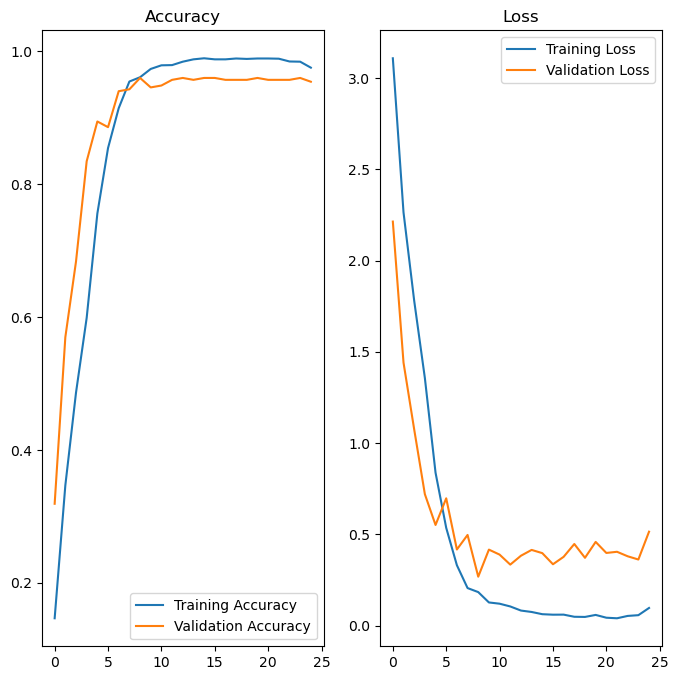

In [33]:
#plotting graphs to show the progression and loss of training and validation data during training model phase

epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.legend()

In [41]:
#Testing predictions

image = 'ginger.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims (img_arr, 0)

In [43]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [45]:
score = tf.nn.softmax(predict)

In [47]:
print('Veg/fruit in image is {} wth accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/fruit in image is ginger wth accuracy of 100.00


NOTE: 
np.argmax(score): Finds the index of the highest value in the score array, which corresponds to the most likely category predicted by the model.

In [49]:
model.save('Image_classify.keras')